<a href="https://colab.research.google.com/github/Bhuvana908/Temperature_Prediction--OLS_Regression_-_Hypothesis_Testing/blob/main/Temperature_Prediction_OLS_Regression_%26_Hypothesis_Testing_by_Kadasani_Bhuvana_Reddy_24XV1M0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠📈 Temperature Prediction – OLS Regression & Hypothesis Testing

This notebook demonstrates **temperature prediction** using **Ordinary Least Squares (OLS) regression** on a historical weather dataset.  
It also performs **statistical hypothesis tests** to evaluate the significance of predictors and relationships between variables.

---

### 📊 What are the **features**?

**PrecipType**

**AppTemp**

**Humidity**

**WindSpeed**

**WindBearing**

**Visibility:**

**Pressure**

**year**

**month**

**day**

### 🎯 What is the **response**?

**Temp**

---

### 📌 Learning Objectives
By the end of this notebook, you should be able to answer:  

* **Is there a relationship between the features and Temperature?**  
* **How strong is that relationship?**  
* **Which features contribute to Temperature?**  
* **What is the effect of each feature?**  
* **Given various weather parameters, can Temperature be predicted?**  

---

### 📂 Contents

**1️⃣ Data Preprocessing**  
- Load `weatherHistory.csv` dataset  
- Handle missing values in `Precip Type`  
- Convert `Formatted Date` to `year`, `month`, `day`  
- Drop unnecessary columns and duplicates  
- Encode categorical variables using `LabelEncoder`  
- Rename columns for simplicity:
  - `Precip Type` → `PrecipType`
  - `Temperature (C)` → `Temp`  
  - `Apparent Temperature (C)` → `AppTemp`  
  - `Wind Speed (km/h)` → `WindSpeed`
  - `Wind Bearing (degrees)` → `WindBearing`
  - `Visibility (km)` → `Visibility`
  - `Pressure (millibars)` → `Pressure`  

**2️⃣ Exploratory Data Analysis**  
- Correlation heatmap to visualize relationships between features  
- Identify top correlated features with target (`Temp`)    

**3️⃣ OLS Regression**  
- Fit an OLS model using `statsmodels`  
- Inspect model coefficients, R², and p-values  
- Visualize **Actual vs Predicted Temperature**  
- Interpret model summary and coefficient significance  

**4️⃣ Hypothesis Testing**  
- **t-test for coefficients**  
  - H₀: Predictor has no effect on Temperature  
  - H₁: Predictor significantly affects Temperature

  ➡️ All predictors had very small values, coonfirming significance

- **Z-test (approximation)** for coefficients  
  - Very large Z-statistics
  - Many p-values are extremely small (≈ 0), while a few are moderately significant

  ➡️ Strong evidence that all predictors meaningfully contribute to Temperature.
  
- **Z-test for sample mean**  
  - Z-statistic is large
  - p-values ≈ 0

  ➡️ Sample mean is significantly different from zero.

- **Chi-square test** for discretized variables  
  - The test checks whether Temperature (Low/High) and Apparent Temperature (Low/High) are independent or related.
  - The Chi-square statistic is large and the p-value is very small (p < 0.05).

  ➡️ This indicates that Temperature and Apparent Temperature are strongly dependent on each other.

---

### 📈 Insights
- t-test and Z-test identify which predictors significantly affect temperature  
- Chi-square test confirms dependency between discretized Temperature and Apparent Temperature  
- OLS regression provides interpretable coefficients for predicting temperature  
- Hypothesis tests validate statistical significance of features  

---

### ⚙️ Usage
1. Run the notebook in **Jupyter Notebook** or **Google Colab**  
2. Upload `weatherHistory.csv`  
3. Execute cells sequentially to see:  
   - Data preprocessing  
   - Regression analysis  
   - Hypothesis testing  
   - Visualizations  

---

## 💡 Q&A: Feature-Temperature Relationships

**1️⃣ Is there a relationship between the features and Temperature?**  
 Yes,
 All predictors show significant effects

<br>

**2️⃣ How strong is that relationship?**  
  - Very strong
  - The full model has high explanatory power(R²).
  - Temperature variability is strongly driven by the included features
<br>

**3️⃣ Which features contribute to Temperature?**  

| Feature                                       | Contribution                                                                                                     |
| --------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **AppTemp**                                   | Strongest positive influence (directly reflects actual temperature)                                              |
| **Humidity, WindSpeed, Visibility, Pressure** | Moderate meteorological effects (impact temperature but less directly)                                           |
| **WindBearing**                               | Weak but statistically relevant effect (direction can slightly influence local temperature)                      |
| **PrecipType**                                | Important categorical effect (rain/snow can lower temperature)                                                   |
| **year, month, day**                          | Seasonal and temporal effects (month/day capture seasonal temperature patterns; year can capture climate trends) |

<br>

**4️⃣ What is the effect of each feature?**  
Coefficients represent the change in Temperature (Temp) given a unit change in each predictor. Some signs may appear unexpected due to multicollinearity among features.

- **PrecipType:** Change from one precipitation type to another (e.g., snow → rain) affects temperature; effect may be positive or negative depending on type.

- **AppTemp:** Positive effect; as apparent temperature increases by 1 unit, actual temperature tends to increase.

- **Humidity:** Usually negative effect; higher humidity can slightly decrease temperature.

- **WindSpeed:** Slight negative effect; stronger winds can reduce temperature due to wind chill.

- **WindBearing:** Effect may be unexpected; direction can influence temperature depending on location and season.

- **Visibility:** Slight positive effect; higher visibility often occurs on warmer, clear days.

- **Pressure:** Can be positive or negative; rising pressure usually indicates warmer, stable weather.

- **year:** Small positive effect if there is a long-term warming trend.

- **month:** Captures seasonal variation; higher months (summer) → higher temperature.

- **day:** Minor effect; daily variations are usually small.

<br>

**5️⃣ Given various weather parameters, can Temperature be predicted?**  
**Yes**<br>
Temperature can be predicted very effectively using physical attributes such as **AppTemp**, **Humidity**, **Pressure**.<br>

In the full OLS regression model, **all physical attributes had statistically significant coefficients (p < 0.05)**.<br>

This means each physical feature **adds unique information** that helps predict price.



In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("weatherHistory.csv")
df.head()

Saving weatherHistory.csv to weatherHistory (6).csv


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [116]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [117]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)


df['Formatted Date'] = df['Formatted Date'].dt.date
df=df.drop_duplicates()

df.head()

/tmp/ipython-input-2194200342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [118]:
df = df.reset_index(drop=True)

In [119]:
df['year'] = pd.to_datetime(df['Formatted Date']).dt.year
df['month'] = pd.to_datetime(df['Formatted Date']).dt.month
df['day'] = pd.to_datetime(df['Formatted Date']).dt.day

In [120]:
df=df.drop(columns=['Summary', 'Daily Summary', 'Formatted Date', 'Loud Cover'])
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1


In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'])
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1


In [122]:
df = df.rename(columns={
    'Precip Type': 'PrecipType',
    'Temperature (C)': 'Temp',
    'Apparent Temperature (C)': 'AppTemp',
    'Wind Speed (km/h)': 'WindSpeed',
    'Wind Bearing (degrees)': 'WindBearing',
    'Visibility (km)': 'Visibility',
    'Pressure (millibars)': 'Pressure',
})

In [123]:
df.head()

,PrecipType,Temp,AppTemp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,year,month,day
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1


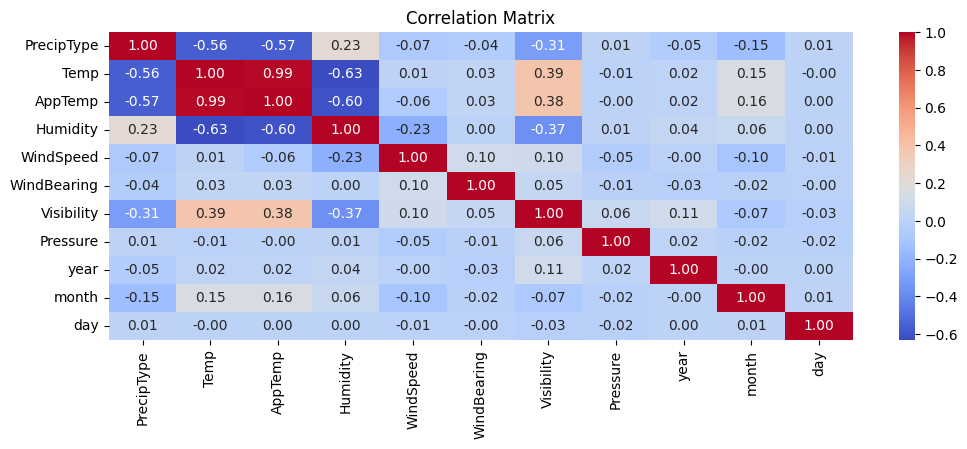

In [124]:
plt.figure(figsize=(12, 4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [125]:
target = 'Temp'
corr_target = corr[target].drop(target).sort_values(ascending=False)
print("\n🔹 Features correlated with target:")
print(corr_target)



🔹 Features correlated with target:
AppTemp        0.992626
Visibility     0.392944
month          0.148506
WindBearing    0.029897
year           0.017547
WindSpeed      0.009324
day           -0.000304
Pressure      -0.005471
PrecipType    -0.562670
Humidity      -0.632333
Name: Temp, dtype: float64


In [126]:
import statsmodels.formula.api as smf

formula="Temp ~ PrecipType + AppTemp + Humidity + WindSpeed + WindBearing + Visibility + Pressure + year + month + day"
lm = smf.ols(formula=formula, data=df).fit()
print(lm.params)

Intercept     -7.390273
PrecipType     0.068970
AppTemp        0.873201
Humidity      -1.424117
WindSpeed      0.080280
WindBearing   -0.000398
Visibility     0.008956
Pressure      -0.000209
year           0.005074
month          0.005453
day           -0.002103
dtype: float64


In [127]:
print(lm.rsquared)

0.9901393777028313


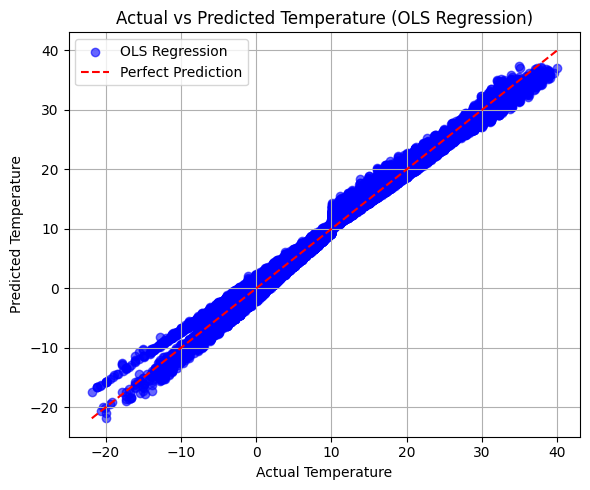

In [128]:
import matplotlib.pyplot as plt


y_actual = df['Temp']
y_pred = lm.fittedvalues

plt.figure(figsize=(6,5))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6, label='OLS Regression')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature (OLS Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot shows that predicted temperatures closely match actual values, indicating accurate OLS regression predictions.
The points’ proximity to the perfect prediction line suggests a strong linear relationship and low prediction error.

In [129]:
print(lm.pvalues)

Intercept      1.637318e-04
PrecipType     2.248209e-08
AppTemp        0.000000e+00
Humidity       0.000000e+00
WindSpeed      0.000000e+00
WindBearing    1.436062e-43
Visibility     3.423458e-27
Pressure       1.764434e-15
year           2.007242e-07
month          3.384763e-09
day            1.398738e-09
dtype: float64


Since, the p values are far less than 0.05, we believe that there is a  relationship between the temperature and the features.

In [130]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.681e+05
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:10:51   Log-Likelihood:            -1.3171e+05
No. Observations:               96424   AIC:                         2.634e+05
Df Residuals:                   96413   BIC:                         2.635e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.3903      1.961     -3.769      

As we have our model, Let's perform Hypothesis testing using t-test, z-test, Chi-Square test.

# **T**-**Test**

In regression, the t-test checks whether each predictor’s coefficient is significantly different from zero — meaning it evaluates each predictor’s contribution to the model rather than differences between group means.

In [131]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm

alpha = 0.05




print("t-test for each coefficient (individual predictors):")
print(f"Intercept = {lm.params['Intercept']:.4f}\n")
for coef_name, coef_val, p_val in zip(lm.params.index, lm.params.values, lm.pvalues):
    if coef_name != 'Intercept':
        print(f"Predictor: {coef_name}")
        print(f"H₀: The coefficient of '{coef_name}' = 0 → predictor has no effect on Temperature.")
        print(f"H₁: The coefficient of '{coef_name}' ≠ 0 → predictor contributes to Temperature.")
        print(f"Coefficient = {coef_val:.4f}, p-value = {p_val:.2e}")
        if p_val < alpha:
            print(f"Observation: p-value < {alpha} → reject H₀ → '{coef_name}' significantly affects Temperature.\n")
        else:
            print(f"Observation: p-value ≥ {alpha} → fail to reject H₀ → '{coef_name}' does not significantly affect Temperature.\n")

t-test for each coefficient (individual predictors):
Intercept = -7.3903

Predictor: PrecipType
H₀: The coefficient of 'PrecipType' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'PrecipType' ≠ 0 → predictor contributes to Temperature.
Coefficient = 0.0690, p-value = 2.25e-08
Observation: p-value < 0.05 → reject H₀ → 'PrecipType' significantly affects Temperature.

Predictor: AppTemp
H₀: The coefficient of 'AppTemp' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'AppTemp' ≠ 0 → predictor contributes to Temperature.
Coefficient = 0.8732, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'AppTemp' significantly affects Temperature.

Predictor: Humidity
H₀: The coefficient of 'Humidity' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'Humidity' ≠ 0 → predictor contributes to Temperature.
Coefficient = -1.4241, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'Humidity' significantly affects Temperature

Here, dataset is large. So T test may not be efficient. Let's go to Z-test.

# **Z-Test**

We use the Z-test in regression to check if each predictor’s coefficient is significantly different from zero, indicating its contribution to the model.

In [132]:
print("Z-test for each coefficient (approximation):")
print(f"Intercept = {lm.params['Intercept']:.4f}\n")
for coef_name, coef_val, se in zip(lm.params.index, lm.params.values, lm.bse):
    if coef_name != 'Intercept':
        z_stat = coef_val / se
        p_val = 2 * (1 - norm.cdf(abs(z_stat)))
        print(f"Predictor: {coef_name}")
        print(f"H₀: The coefficient of '{coef_name}' = 0 → predictor has no effect on Temperature.")
        print(f"H₁: The coefficient of '{coef_name}' ≠ 0 → predictor contributes to Temperature.")
        print(f"Z-statistic = {z_stat:.4f}, p-value = {p_val:.2e}")
        if p_val < alpha:
            print(f"Observation: p-value < {alpha} → reject H₀ → '{coef_name}' significantly affects Temperature.\n")
        else:
            print(f"Observation: p-value ≥ {alpha} → fail to reject H₀ → '{coef_name}' does not significantly affect Temperature.\n")

Z-test for each coefficient (approximation):
Intercept = -7.3903

Predictor: PrecipType
H₀: The coefficient of 'PrecipType' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'PrecipType' ≠ 0 → predictor contributes to Temperature.
Z-statistic = 5.5922, p-value = 2.24e-08
Observation: p-value < 0.05 → reject H₀ → 'PrecipType' significantly affects Temperature.

Predictor: AppTemp
H₀: The coefficient of 'AppTemp' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'AppTemp' ≠ 0 → predictor contributes to Temperature.
Z-statistic = 1899.6314, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'AppTemp' significantly affects Temperature.

Predictor: Humidity
H₀: The coefficient of 'Humidity' = 0 → predictor has no effect on Temperature.
H₁: The coefficient of 'Humidity' ≠ 0 → predictor contributes to Temperature.
Z-statistic = -65.0005, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'Humidity' significantly affects Temperature.

P

The classical Z-test is used to determine if a sample mean significantly differs from a hypothesized population mean.

In [133]:
import seaborn as sns
import numpy as np
from scipy import stats

sample = df['Humidity']
sample_mean = sample.mean()
sample_std = sample.std()
n = len(sample)

mu_0 = 0
print("The null hypothesis H₀: sample mean = 0")
print("The alternative hypothesis H₁: sample mean ≠ 0")

z = (sample_mean - mu_0) / (sample_std / np.sqrt(n))


p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-statistic: {z:.2f}")
print(f"P-value: {p_value:.5f}")


The null hypothesis H₀: sample mean = 0
The alternative hypothesis H₁: sample mean ≠ 0
Z-statistic: 1167.46
P-value: 0.00000


Since the p-value is essentially 0 and the Z-statistic is huge, the sample mean is very far from 0. So, we reject the null hypothesis and conclude that the sample mean is significantly different from zero.

# **Chi-Square Test**

The chi-square test checks if two categorical variables (Temp and AppTemp) are related.
A small p-value means they are dependent, so knowing one helps predict the other.

In [134]:
df['Temp'] = pd.qcut(df['Temp'], 2, labels=['Low','High'])
df['AppTemp'] = pd.qcut(df['AppTemp'], 2, labels=['Low','High'])

contingency = pd.crosstab(df['Temp'], df['AppTemp'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square test for Temp vs AppTemp:")
print(f"H₀: Temp and AppTemp are independent.")
print(f"H₁: Temp and AppTemp are dependent.")
print(f"Chi2 = {chi2:.4f}, p-value = {p:.2e}")
if p < alpha:
    print(f"Observation: p-value < {alpha} → reject H₀ → Temp and AppTemp are dependent.\n")
else:
    print(f"Observation: p-value ≥ {alpha} → fail to reject H₀ → Temp and AppTemp are independent.\n")

Chi-square test for Temp vs AppTemp:
H₀: Temp and AppTemp are independent.
H₁: Temp and AppTemp are dependent.
Chi2 = 96420.0000, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → Temp and AppTemp are dependent.

